## Model Selection using RFE (Bike Sharing Case Study)

Bike Sharing Assignement
Problem Statement
A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free.
The company want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:
- Which variables are significant in predicting the demand for shared bikes.
- How well those variables describe the bike demands
Business Goal:
To model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features

### Importing and Understanding Data

In [562]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')
#importig necessary libraries
import numpy as np, pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [563]:
# Importing day.csv and looking at first five rows
day=pd.read_csv("day.CSV")
day.head()

instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  01-01-2018       1   0     1        0        1           1   
1        2  02-01-2018       1   0     1        0        2           1   
2        3  03-01-2018       1   0     1        0        3           1   
3        4  04-01-2018       1   0     1        0        4           1   
4        5  05-01-2018       1   0     1        0        5           1   

   weathersit       temp     atemp      hum  windspeed  casual  registered  \
0           2  14.110847  18.18125  80.5833  10.749882     331         654   
1           2  14.902598  17.68695  69.6087  16.652113     131         670   
2           1   8.050924   9.47025  43.7273  16.636703     120        1229   
3           1   8.200000  10.60610  59.0435  10.739832     108        1454   
4           1   9.305237  11.46350  43.6957  12.522300      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600

In [564]:
day.shape
(730, 16)


(730, 16)

In [565]:
day.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

there are no missing data in the data set

In [566]:
day.workingday.value_counts()

1    504
0    226
Name: workingday, dtype: int64

In [567]:
day.holiday.value_counts()

0    709
1     21
Name: holiday, dtype: int64

### Data Preparation

In [568]:
# Converting 'weathersit' and 'season' column values 1,2,3,4 into string categorical values

day['season'] = day['season'].map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})

day['weathersit'] = day['weathersit'].map({1:'Clear', 2:'Mist & Cloudy', 3:'Light Snow', 4:'Heavy Rain'})

# Converting 'mnth' column values 1 to 12 into Jan to Dec respectively

day['mnth'] = day['mnth'].map({1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun', 7:'Jul', 8:'Aug', 9:'Sep', 10:'Oct', 11:'Nov', 12:'Dec'})

In [569]:
# Converting 'yr' column values 0 and 1 into string 2018 and 2019 respectively

day['yr'] = day['yr'].map({0:'2018', 1:'2019'})

In [570]:
# Converting 'weekday' column  into string  values as Monday to Sunday

day['weekday'] = day['weekday'].map({1:'Monday', 2:'Tuesday', 3:'Wednesday', 4:'Thursday', 5:'Friday', 6:'Saturday', 0:'Sunday'})


In [571]:
# dropping 'instant','dteday',"casual","registered" column since instant is just an index
# dropping atemp as temp col is quite pricese
# dropping dteday col as month, weeday, years are precisely given so no more required for the model


day = day.drop(['instant','dteday','casual','registered','atemp'], axis=1)

In [572]:
day.head()

season    yr mnth  holiday    weekday  workingday     weathersit  \
0  spring  2018  Jan        0     Monday           1  Mist & Cloudy   
1  spring  2018  Jan        0    Tuesday           1  Mist & Cloudy   
2  spring  2018  Jan        0  Wednesday           1          Clear   
3  spring  2018  Jan        0   Thursday           1          Clear   
4  spring  2018  Jan        0     Friday           1          Clear   

        temp      hum  windspeed   cnt  
0  14.110847  80.5833  10.749882   985  
1  14.902598  69.6087  16.652113   801  
2   8.050924  43.7273  16.636703  1349  
3   8.200000  59.0435  10.739832  1562  
4   9.305237  43.6957  12.522300  1600

In [573]:
day.shape
# now we have 11 colums left 

(730, 11)

In [574]:
day.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    object 
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   hum         730 non-null    float64
 9   windspeed   730 non-null    float64
 10  cnt         730 non-null    int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 62.9+ KB


In [575]:
day.describe()
# getting the statistical summary 

holiday  workingday        temp         hum   windspeed          cnt
count  730.000000  730.000000  730.000000  730.000000  730.000000   730.000000
mean     0.028767    0.690411   20.319259   62.765175   12.763620  4508.006849
std      0.167266    0.462641    7.506729   14.237589    5.195841  1936.011647
min      0.000000    0.000000    2.424346    0.000000    1.500244    22.000000
25%      0.000000    0.000000   13.811885   52.000000    9.041650  3169.750000
50%      0.000000    1.000000   20.465826   62.625000   12.125325  4548.500000
75%      0.000000    1.000000   26.880615   72.989575   15.625589  5966.000000
max      1.000000    1.000000   35.328347   97.250000   34.000021  8714.000000

# Data Visualisation

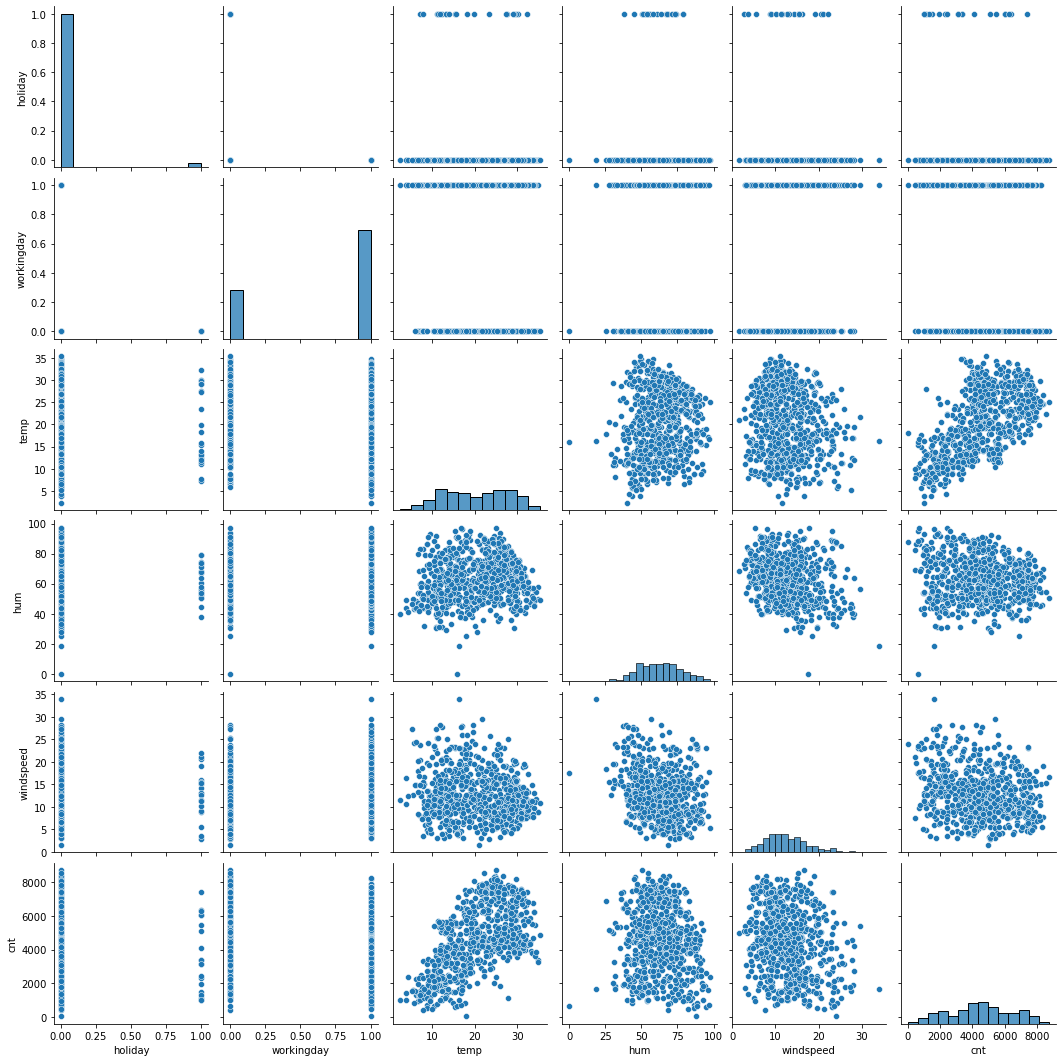

In [576]:
# plotting pair plots for the numeric variables
sns.pairplot(day)
plt.show()

<Figure size 1440x720 with 0 Axes>

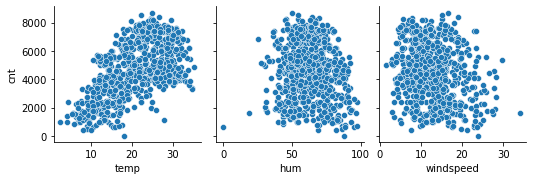

In [577]:
plt.figure(figsize=(20,10))
sns.pairplot(x_vars=['temp', 'hum', 'windspeed'], y_vars=['cnt'], data=day)
plt.show()

In [578]:
# from the above graph we observe that temp and atemp are highly correlated

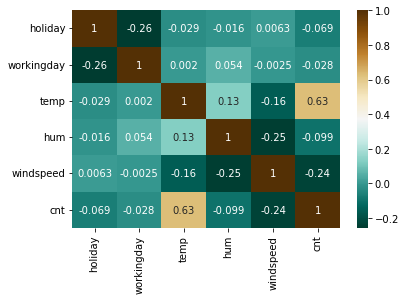

In [579]:
# visualising the correlation matrix for different variables
sns.heatmap(day.corr(), cmap="BrBG_r", annot = True)
plt.show()

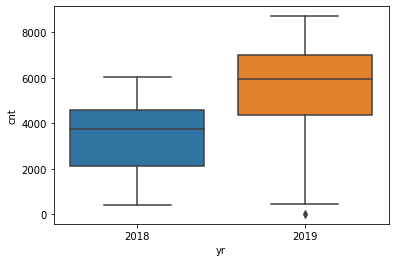

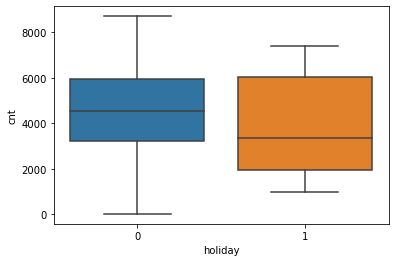

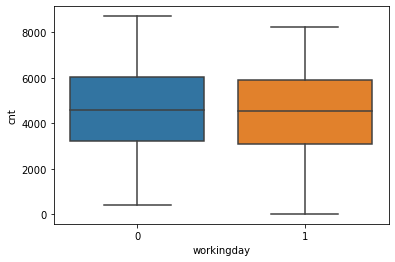

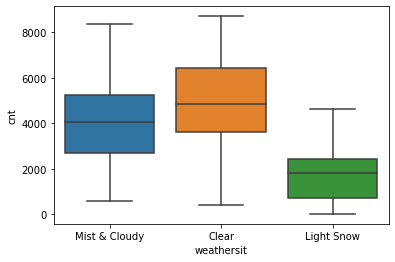

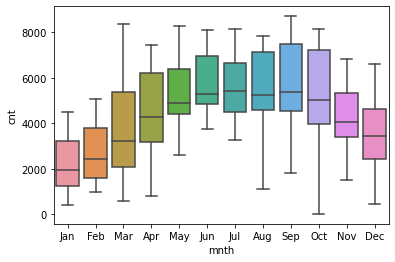

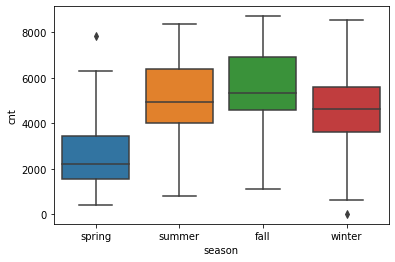

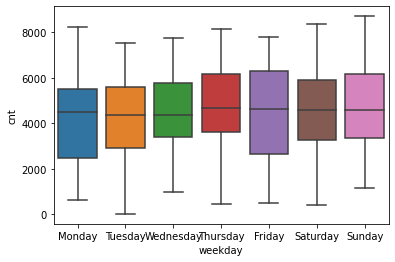

In [580]:

#visualising the categorical data with the help of boxplots
categorical = ["yr","holiday","workingday","weathersit","mnth","season","weekday"]
for i in categorical:
    
    sns.boxplot(x = i, y = 'cnt', data = day)
    plt.show()    

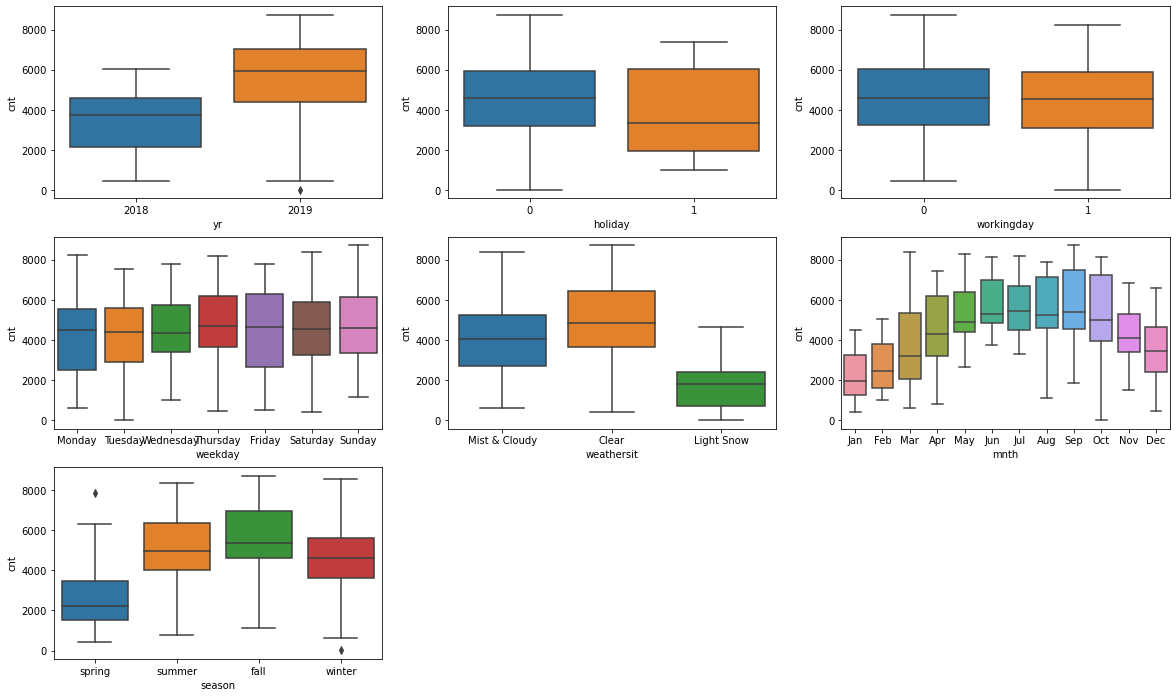

In [581]:
plt.figure(figsize=(20, 12))
plt.subplot(3,3,1)
sns.boxplot(x = 'yr', y = 'cnt', data = day)
plt.subplot(3,3,2)
sns.boxplot(x = 'holiday', y = 'cnt', data = day)
plt.subplot(3,3,3)
sns.boxplot(x = 'workingday', y = 'cnt', data = day)
plt.subplot(3,3,4)
sns.boxplot(x = 'weekday', y = 'cnt', data = day)
plt.subplot(3,3,5)
sns.boxplot(x = 'weathersit', y = 'cnt', data = day)
plt.subplot(3,3,6)
sns.boxplot(x = 'mnth', y = 'cnt', data = day)
plt.subplot(3,3,7)
sns.boxplot(x = 'season', y = 'cnt', data = day)
plt.show()


### Dummy Variables

In [582]:











# Get the dummy variables for variable 'season' and store it in a new dataframe - 'season_dummy'
season_dummy = pd.get_dummies(day['season'])


In [583]:
# Check what the dataset 'season_dummy' looks like
season_dummy.head()


fall  spring  summer  winter
0     0       1       0       0
1     0       1       0       0
2     0       1       0       0
3     0       1       0       0
4     0       1       0       0

Now, we don't need 4 columns. You can drop the fall column, as the type of season can be identified with just the last three columns where —
- 000 will correspond to fall
- 001 will correspond to winter
- 100 will correspond to spring
- 010 will correspond to summer


In [584]:
# Let's drop the first column from 'season_dummy'  using 'drop_first = True'

season_dummy = pd.get_dummies(day['season'], drop_first = True)

In [585]:
season_dummy.head(2)

spring  summer  winter
0       1       0       0
1       1       0       0

In [586]:
# Add the results to the original 'day' dataframe

day = pd.concat([day, season_dummy], axis = 1)

In [587]:
# Now let's see the head of our dataframe.
day.head()

season    yr mnth  holiday    weekday  workingday     weathersit  \
0  spring  2018  Jan        0     Monday           1  Mist & Cloudy   
1  spring  2018  Jan        0    Tuesday           1  Mist & Cloudy   
2  spring  2018  Jan        0  Wednesday           1          Clear   
3  spring  2018  Jan        0   Thursday           1          Clear   
4  spring  2018  Jan        0     Friday           1          Clear   

        temp      hum  windspeed   cnt  spring  summer  winter  
0  14.110847  80.5833  10.749882   985       1       0       0  
1  14.902598  69.6087  16.652113   801       1       0       0  
2   8.050924  43.7273  16.636703  1349       1       0       0  
3   8.200000  59.0435  10.739832  1562       1       0       0  
4   9.305237  43.6957  12.522300  1600       1       0       0

In [588]:
# dropping the season column
day.drop(["season"], axis = 1, inplace = True)

In [589]:
day.head()

yr mnth  holiday    weekday  workingday     weathersit       temp  \
0  2018  Jan        0     Monday           1  Mist & Cloudy  14.110847   
1  2018  Jan        0    Tuesday           1  Mist & Cloudy  14.902598   
2  2018  Jan        0  Wednesday           1          Clear   8.050924   
3  2018  Jan        0   Thursday           1          Clear   8.200000   
4  2018  Jan        0     Friday           1          Clear   9.305237   

       hum  windspeed   cnt  spring  summer  winter  
0  80.5833  10.749882   985       1       0       0  
1  69.6087  16.652113   801       1       0       0  
2  43.7273  16.636703  1349       1       0       0  
3  59.0435  10.739832  1562       1       0       0  
4  43.6957  12.522300  1600       1       0       0

In [590]:
# Similarly get the dummy variables for the 'yr' categorical column and store it in a new dataframe - 'year_dummy'
year_dummy = pd.get_dummies(day['yr'])


In [591]:
#dropping the 1st column of the year_dummy
year_dummy = pd.get_dummies(day['yr'], drop_first = True)


In [592]:
# Add the results to the original 'day' dataframe
day = pd.concat([day, year_dummy], axis = 1)


In [593]:
# Drop 'yr' column as we have created the dummies for it
day.drop('yr', axis = 1, inplace = True)

In [594]:
day.head()

mnth  holiday    weekday  workingday     weathersit       temp      hum  \
0  Jan        0     Monday           1  Mist & Cloudy  14.110847  80.5833   
1  Jan        0    Tuesday           1  Mist & Cloudy  14.902598  69.6087   
2  Jan        0  Wednesday           1          Clear   8.050924  43.7273   
3  Jan        0   Thursday           1          Clear   8.200000  59.0435   
4  Jan        0     Friday           1          Clear   9.305237  43.6957   

   windspeed   cnt  spring  summer  winter  2019  
0  10.749882   985       1       0       0     0  
1  16.652113   801       1       0       0     0  
2  16.636703  1349       1       0       0     0  
3  10.739832  1562       1       0       0     0  
4  12.522300  1600       1       0       0     0

In [595]:
# Similarly get the dummy variables for the 'mnth' categorical column and store it in a new dataframe - 'mnth_dummy'
mnth_dummy = pd.get_dummies(day['mnth'])


In [596]:
mnth_dummy.head(2)

Apr  Aug  Dec  Feb  Jan  Jul  Jun  Mar  May  Nov  Oct  Sep
0    0    0    0    0    1    0    0    0    0    0    0    0
1    0    0    0    0    1    0    0    0    0    0    0    0

In [597]:
# Let's drop the first column from 'mnth_dummy' df using 'drop_first = True'
mnth_dummy = pd.get_dummies(day['mnth'], drop_first = True)


In [598]:
mnth_dummy.head(2)

Aug  Dec  Feb  Jan  Jul  Jun  Mar  May  Nov  Oct  Sep
0    0    0    0    1    0    0    0    0    0    0    0
1    0    0    0    1    0    0    0    0    0    0    0

In [599]:
# Add the results to the original 'day' dataframe
day = pd.concat([day, mnth_dummy], axis = 1)


In [600]:
# Drop 'mnth' column as we have created the dummies for it
day.drop(['mnth'], axis = 1, inplace = True)

In [601]:
day.head()

holiday    weekday  workingday     weathersit       temp      hum  \
0        0     Monday           1  Mist & Cloudy  14.110847  80.5833   
1        0    Tuesday           1  Mist & Cloudy  14.902598  69.6087   
2        0  Wednesday           1          Clear   8.050924  43.7273   
3        0   Thursday           1          Clear   8.200000  59.0435   
4        0     Friday           1          Clear   9.305237  43.6957   

   windspeed   cnt  spring  summer  ...  Dec  Feb  Jan  Jul  Jun  Mar  May  \
0  10.749882   985       1       0  ...    0    0    1    0    0    0    0   
1  16.652113   801       1       0  ...    0    0    1    0    0    0    0   
2  16.636703  1349       1       0  ...    0    0    1    0    0    0    0   
3  10.739832  1562       1       0  ...    0    0    1    0    0    0    0   
4  12.522300  1600       1       0  ...    0    0    1    0    0    0    0   

   Nov  Oct  Sep  
0    0    0    0  
1    0    0    0  
2    0    0    0  
3    0    0    0  
4    0    0    0  

[5 rows x 23 columns]

In [602]:
# Similarly get the dummy variables for the 'weekday' categorical column and store it in a new dataframe - 'weekday_dummy'
weekday_dummy = pd.get_dummies(day['weekday'])


In [603]:
# Let's drop the first column from 'weekday_dummy' df using 'drop_first = True'
weekday_dummy = pd.get_dummies(day['weekday'], drop_first = True)


In [604]:
# Add the results to the original 'day' dataframe
day = pd.concat([day, weekday_dummy], axis = 1)


In [605]:
# Drop 'weekday' column as we have created the dummies for it
day.drop(['weekday'], axis = 1, inplace = True)


In [606]:
weekday_dummy.head()

Monday  Saturday  Sunday  Thursday  Tuesday  Wednesday
0       1         0       0         0        0          0
1       0         0       0         0        1          0
2       0         0       0         0        0          1
3       0         0       0         1        0          0
4       0         0       0         0        0          0

In [607]:
day.head()

holiday  workingday     weathersit       temp      hum  windspeed   cnt  \
0        0           1  Mist & Cloudy  14.110847  80.5833  10.749882   985   
1        0           1  Mist & Cloudy  14.902598  69.6087  16.652113   801   
2        0           1          Clear   8.050924  43.7273  16.636703  1349   
3        0           1          Clear   8.200000  59.0435  10.739832  1562   
4        0           1          Clear   9.305237  43.6957  12.522300  1600   

   spring  summer  winter  ...  May  Nov  Oct  Sep  Monday  Saturday  Sunday  \
0       1       0       0  ...    0    0    0    0       1         0       0   
1       1       0       0  ...    0    0    0    0       0         0       0   
2       1       0       0  ...    0    0    0    0       0         0       0   
3       1       0       0  ...    0    0    0    0       0         0       0   
4       1       0       0  ...    0    0    0    0       0         0       0   

   Thursday  Tuesday  Wednesday  
0         0        0          0  
1         0        1          0  
2         0        0          1  
3         1        0          0  
4         0        0          0  

[5 rows x 28 columns]

In [608]:
# Similarly get the dummy variables for the 'weathersit' categorical column and store it in a new dataframe - 'weathersit_dummy'
weathersit_dummy = pd.get_dummies(day['weathersit'])

In [609]:
weathersit_dummy.head(2)

Clear  Light Snow  Mist & Cloudy
0      0           0              1
1      0           0              1

In [610]:
# Let's drop the first column from 'weathersit_dummy' df using 'drop_first = True'
weathersit_dummy = pd.get_dummies(day['weathersit'], drop_first = True)


In [611]:
# Add the results to the original 'day' dataframe
day = pd.concat([day, weathersit_dummy], axis = 1)


In [612]:
# Drop 'weathersit' column as we have created the dummies for it
day.drop(['weathersit'], axis = 1, inplace = True)

In [613]:
weathersit_dummy.head()

Light Snow  Mist & Cloudy
0           0              1
1           0              1
2           0              0
3           0              0
4           0              0

In [614]:
day.head()

holiday  workingday       temp      hum  windspeed   cnt  spring  summer  \
0        0           1  14.110847  80.5833  10.749882   985       1       0   
1        0           1  14.902598  69.6087  16.652113   801       1       0   
2        0           1   8.050924  43.7273  16.636703  1349       1       0   
3        0           1   8.200000  59.0435  10.739832  1562       1       0   
4        0           1   9.305237  43.6957  12.522300  1600       1       0   

   winter  2019  ...  Oct  Sep  Monday  Saturday  Sunday  Thursday  Tuesday  \
0       0     0  ...    0    0       1         0       0         0        0   
1       0     0  ...    0    0       0         0       0         0        1   
2       0     0  ...    0    0       0         0       0         0        0   
3       0     0  ...    0    0       0         0       0         1        0   
4       0     0  ...    0    0       0         0       0         0        0   

   Wednesday  Light Snow  Mist & Cloudy  
0          0           0              1  
1          0           0              1  
2          1           0              0  
3          0           0              0  
4          0           0              0  

[5 rows x 29 columns]

In [615]:
day.describe()

holiday  workingday        temp         hum   windspeed  \
count  730.000000  730.000000  730.000000  730.000000  730.000000   
mean     0.028767    0.690411   20.319259   62.765175   12.763620   
std      0.167266    0.462641    7.506729   14.237589    5.195841   
min      0.000000    0.000000    2.424346    0.000000    1.500244   
25%      0.000000    0.000000   13.811885   52.000000    9.041650   
50%      0.000000    1.000000   20.465826   62.625000   12.125325   
75%      0.000000    1.000000   26.880615   72.989575   15.625589   
max      1.000000    1.000000   35.328347   97.250000   34.000021   

               cnt      spring      summer      winter        2019  ...  \
count   730.000000  730.000000  730.000000  730.000000  730.000000  ...   
mean   4508.006849    0.246575    0.252055    0.243836    0.500000  ...   
std    1936.011647    0.431313    0.434490    0.429689    0.500343  ...   
min      22.000000    0.000000    0.000000    0.000000    0.000000  ...   
25%    3169.750000    0.000000    0.000000    0.000000    0.000000  ...   
50%    4548.500000    0.000000    0.000000    0.000000    0.500000  ...   
75%    5966.000000    0.000000    1.000000    0.000000    1.000000  ...   
max    8714.000000    1.000000    1.000000    1.000000    1.000000  ...   

              Oct         Sep      Monday    Saturday      Sunday    Thursday  \
count  730.000000  730.000000  730.000000  730.000000  730.000000  730.000000   
mean     0.084932    0.082192    0.143836    0.142466    0.142466    0.142466   
std      0.278971    0.274845    0.351164    0.349767    0.349767    0.349767   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
50%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
75%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

          Tuesday   Wednesday  Light Snow  Mist & Cloudy  
count  730.000000  730.000000  730.000000     730.000000  
mean     0.143836    0.142466    0.028767       0.336986  
std      0.351164    0.349767    0.167266       0.473004  
min      0.000000    0.000000    0.000000       0.000000  
25%      0.000000    0.000000    0.000000       0.000000  
50%      0.000000    0.000000    0.000000       0.000000  
75%      0.000000    0.000000    0.000000       1.000000  
max      1.000000    1.000000    1.000000       1.000000  

[8 rows x 29 columns]

## Splitting the Data into Training and Testing Sets

In [616]:
#importing the necessary libraries
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively

df_train, df_test = train_test_split(day, train_size = 0.7, test_size = 0.3, random_state = 100)

### Rescaling the Features 

We will use MinMax scaling.

In [617]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [618]:
# Apply scaler() to all the columns except the 'categorical' and 'dummy' variables
num_vars = ['temp', 'hum', 'windspeed', 'cnt']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [619]:
df_train.describe()

holiday  workingday        temp         hum   windspeed         cnt  \
count  510.000000  510.000000  510.000000  510.000000  510.000000  510.000000   
mean     0.025490    0.711765    0.537262    0.650369    0.320768    0.513620   
std      0.157763    0.453386    0.225844    0.145882    0.169797    0.224593   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.339853    0.538643    0.199179    0.356420   
50%      0.000000    1.000000    0.540519    0.653714    0.296763    0.518638   
75%      0.000000    1.000000    0.735215    0.754830    0.414447    0.684710   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

           spring      summer     winter        2019  ...         Oct  \
count  510.000000  510.000000  510.00000  510.000000  ...  510.000000   
mean     0.243137    0.245098    0.24902    0.507843  ...    0.086275   
std      0.429398    0.430568    0.43287    0.500429  ...    0.281045   
min      0.000000    0.000000    0.00000    0.000000  ...    0.000000   
25%      0.000000    0.000000    0.00000    0.000000  ...    0.000000   
50%      0.000000    0.000000    0.00000    1.000000  ...    0.000000   
75%      0.000000    0.000000    0.00000    1.000000  ...    0.000000   
max      1.000000    1.000000    1.00000    1.000000  ...    1.000000   

              Sep      Monday    Saturday      Sunday    Thursday     Tuesday  \
count  510.000000  510.000000  510.000000  510.000000  510.000000  510.000000   
mean     0.080392    0.154902    0.129412    0.137255    0.143137    0.152941   
std      0.272166    0.362166    0.335985    0.344454    0.350557    0.360284   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
50%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
75%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

        Wednesday  Light Snow  Mist & Cloudy  
count  510.000000  510.000000     510.000000  
mean     0.135294    0.029412       0.343137  
std      0.342373    0.169124       0.475223  
min      0.000000    0.000000       0.000000  
25%      0.000000    0.000000       0.000000  
50%      0.000000    0.000000       0.000000  
75%      0.000000    0.000000       1.000000  
max      1.000000    1.000000       1.000000  

[8 rows x 29 columns]

In [620]:
df_train.head()

holiday  workingday      temp       hum  windspeed       cnt  spring  \
653        0           1  0.509887  0.575354   0.300794  0.864243       0   
576        0           1  0.815169  0.725633   0.264686  0.827658       0   
426        0           0  0.442393  0.640189   0.255342  0.465255       1   
728        0           1  0.245101  0.498067   0.663106  0.204096       1   
482        0           0  0.395666  0.504508   0.188475  0.482973       0   

     summer  winter  2019  ...  Oct  Sep  Monday  Saturday  Sunday  Thursday  \
653       0       1     1  ...    1    0       0         0       0         0   
576       0       0     1  ...    0    0       0         0       0         0   
426       0       0     1  ...    0    0       0         0       1         0   
728       0       0     1  ...    0    0       1         0       0         0   
482       1       0     1  ...    0    0       0         0       1         0   

     Tuesday  Wednesday  Light Snow  Mist & Cloudy  
653        0          1           0              0  
576        0          1           0              0  
426        0          0           0              1  
728        0          0           0              0  
482        0          0           0              1  

[5 rows x 29 columns]

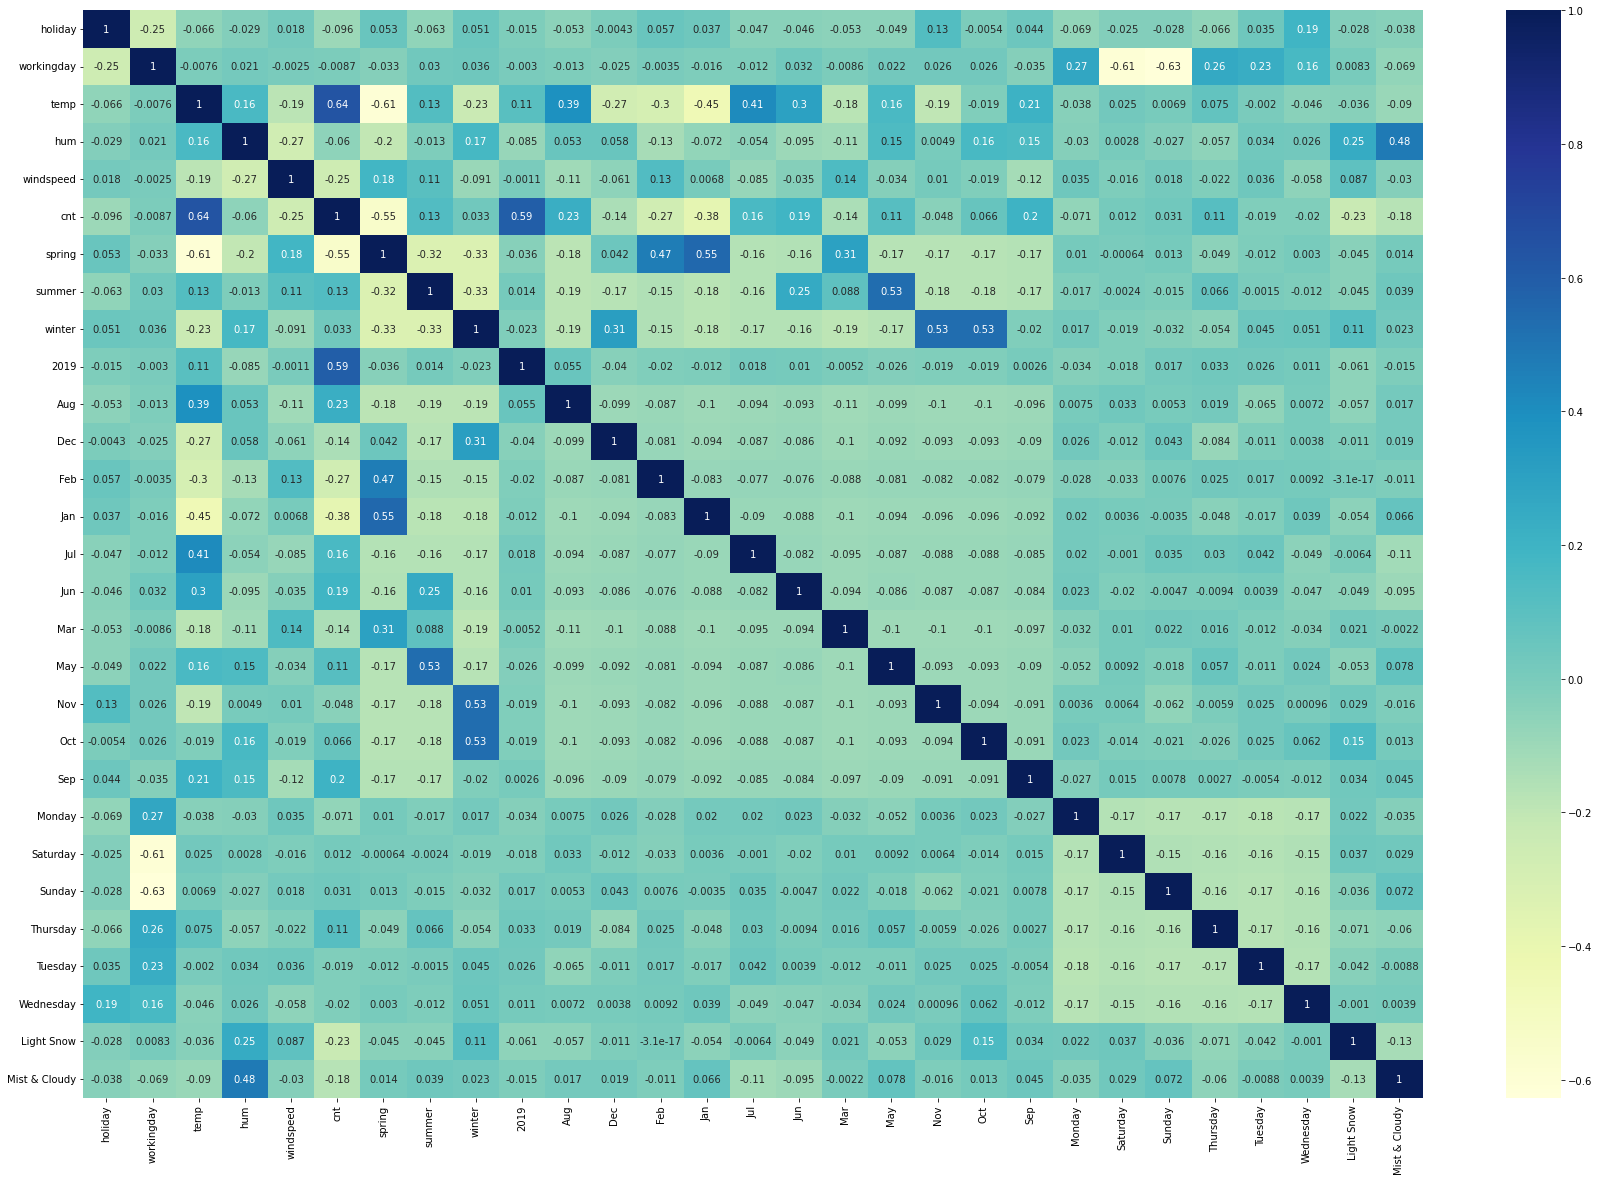

In [621]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (30, 20))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()


In [622]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 510 entries, 653 to 79
Data columns (total 29 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   holiday        510 non-null    int64  
 1   workingday     510 non-null    int64  
 2   temp           510 non-null    float64
 3   hum            510 non-null    float64
 4   windspeed      510 non-null    float64
 5   cnt            510 non-null    float64
 6   spring         510 non-null    uint8  
 7   summer         510 non-null    uint8  
 8   winter         510 non-null    uint8  
 9   2019           510 non-null    uint8  
 10  Aug            510 non-null    uint8  
 11  Dec            510 non-null    uint8  
 12  Feb            510 non-null    uint8  
 13  Jan            510 non-null    uint8  
 14  Jul            510 non-null    uint8  
 15  Jun            510 non-null    uint8  
 16  Mar            510 non-null    uint8  
 17  May            510 non-null    uint8  
 18  Nov      

### Dividing into X and Y sets for the model building

In [623]:
y_train=df_train.pop('cnt')
X_train=df_train

In [624]:
X_train.shape

(510, 28)

## Building our model

This time, we will be using the **LinearRegression function from SciKit Learn** for its compatibility with RFE (which is a utility from sklearn)

### RFE
Recursive feature elimination

In [625]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [626]:
# Running RFE with the output number of the variable equal to 14
lm = LinearRegression()
lm.fit(X_train, y_train)
rfe = RFE(estimator= lm, n_features_to_select=14)            # running RFE
rfe = rfe.fit(X_train, y_train)

In [627]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('holiday', True, 1),
 ('workingday', False, 4),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1),
 ('2019', True, 1),
 ('Aug', False, 10),
 ('Dec', False, 2),
 ('Feb', False, 3),
 ('Jan', True, 1),
 ('Jul', True, 1),
 ('Jun', False, 14),
 ('Mar', False, 15),
 ('May', False, 7),
 ('Nov', True, 1),
 ('Oct', False, 12),
 ('Sep', True, 1),
 ('Monday', False, 9),
 ('Saturday', False, 5),
 ('Sunday', False, 6),
 ('Thursday', False, 13),
 ('Tuesday', False, 8),
 ('Wednesday', False, 11),
 ('Light Snow', True, 1),
 ('Mist & Cloudy', True, 1)]

In [628]:
col = X_train.columns[rfe.support_]
col


Index(['holiday', 'temp', 'hum', 'windspeed', 'spring', 'summer', 'winter',
       '2019', 'Jan', 'Jul', 'Nov', 'Sep', 'Light Snow', 'Mist & Cloudy'],
      dtype='object')

In [629]:
len(col)

14

In [630]:
X_train.columns[~rfe.support_]


Index(['workingday', 'Aug', 'Dec', 'Feb', 'Jun', 'Mar', 'May', 'Oct', 'Monday',
       'Saturday', 'Sunday', 'Thursday', 'Tuesday', 'Wednesday'],
      dtype='object')

### Building model using statsmodel, for the detailed statistics

In [631]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]


In [632]:
X_train_rfe.head()

holiday      temp       hum  windspeed  spring  summer  winter  2019  \
653        0  0.509887  0.575354   0.300794       0       0       1     1   
576        0  0.815169  0.725633   0.264686       0       0       0     1   
426        0  0.442393  0.640189   0.255342       1       0       0     1   
728        0  0.245101  0.498067   0.663106       1       0       0     1   
482        0  0.395666  0.504508   0.188475       0       1       0     1   

     Jan  Jul  Nov  Sep  Light Snow  Mist & Cloudy  
653    0    0    0    0           0              0  
576    0    1    0    0           0              0  
426    0    0    0    0           0              1  
728    0    0    0    0           0              0  
482    0    0    0    0           0              1

In [633]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)

In [634]:
lm = sm.OLS(y_train,X_train_rfe).fit()

In [635]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     191.4
Date:                Mon, 09 Jan 2023   Prob (F-statistic):          2.25e-189
Time:                        01:30:42   Log-Likelihood:                 512.39
No. Observations:                 510   AIC:                            -994.8
Df Residuals:                     495   BIC:                            -931.3
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.3030      0.035      8.597

In [636]:
# Since 'nov' has high P value  , removing straintaway

X_train_new = X_train_rfe.drop(['Nov'], axis=1)

In [637]:
# Adding a constant variable 
X_train_lm = sm.add_constant(X_train_new)

In [638]:
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

In [639]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     205.5
Date:                Mon, 09 Jan 2023   Prob (F-statistic):          4.45e-190
Time:                        01:30:42   Log-Likelihood:                 511.29
No. Observations:                 510   AIC:                            -994.6
Df Residuals:                     496   BIC:                            -935.3
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2957      0.035      8.466      0.000       0.227       0.364
holiday          -0.0968      0.026     -3.796      0.000      -0.147      -0.047
temp              0.5127      0.035     14.720      0.000       0.444       0.581
hum              -0.1665      0.038     -4.410      0.000      -0.241      -0.092
windspeed        -0.1871      0.026     -7.243      0.000      -0.238      -0.136
spring           -0.0518      0.021     -2.472      0.014      -0.093      -0.011
summer            0.0491      0.015      3.259      0.001       0.019       0.079
winter            0.0931      0.017      5.324      0.000       0.059       0.127
2019              0.2301      0.008     28.348      0.000       0.214       0.246
Jan              -0.0331      0.018     -1.881      0.061      -0.068       0.001
Jul              -0.0559      0.018     -3.056      0.002      -0.092      -0.020
Sep               0.0825      0.017      4.940      0.000       0.050       0.115
Light Snow       -0.2405      0.026     -9.135      0.000      -0.292      -0.189
Mist & Cloudy    -0.0541      0.010     -5.159      0.000      -0.075      -0.034
==============================================================================
Omnibus:                       58.682   Durbin-Watson:                   2.047
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              133.185
Skew:                          -0.624   Prob(JB):                     1.20e-29
Kurtosis:                       5.171   Cond. No.                         19.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [640]:
# Dropping 'const' 
X_train_new = X_train_new.drop(['const'], axis=1)

In [641]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
2             hum  29.05
1            temp  16.70
3       windspeed   4.66
4          spring   4.34
6          winter   3.38
5          summer   2.78
12  Mist & Cloudy   2.28
7            2019   2.09
8             Jan   1.67
9             Jul   1.59
10            Sep   1.38
11     Light Snow   1.24
0         holiday   1.04

Rebuilding the model without `jan`

In [642]:
# Since 'jan' has very high p value, removing 

X_train_new = X_train_new.drop(['Jan'], axis=1)

In [643]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)

In [644]:
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

In [645]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     221.2
Date:                Mon, 09 Jan 2023   Prob (F-statistic):          1.69e-190
Time:                        01:30:43   Log-Likelihood:                 509.47
No. Observations:                 510   AIC:                            -992.9
Df Residuals:                     497   BIC:                            -937.9
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2841      0.034      8.242

In [646]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
2             hum  28.06
1            temp  16.02
3       windspeed   4.65
4          spring   4.01
6          winter   3.35
5          summer   2.78
11  Mist & Cloudy   2.28
7            2019   2.08
8             Jul   1.58
9             Sep   1.38
10     Light Snow   1.24
0         holiday   1.04

We could have :

High P value and High VIF (Remove straighaway)
-High-low - High P , low VIF (Remove these first) - Low P, high VIF (Remove after the above once are removed)

Low P Low VIF (Keep these varaibales)

In [647]:
# Since 'hum' has high vif, removing 

X_train_new = X_train_new.drop(['hum'], axis=1)

In [648]:
# Adding a constant variable 
X_train_lm = sm.add_constant(X_train_new)

In [649]:
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

In [650]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     230.4
Date:                Mon, 09 Jan 2023   Prob (F-statistic):          2.40e-187
Time:                        01:30:44   Log-Likelihood:                 499.17
No. Observations:                 510   AIC:                            -974.3
Df Residuals:                     498   BIC:                            -923.5
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1996      0.030      6.758

In [651]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
1            temp  5.09
2       windspeed  4.60
4          summer  2.21
3          spring  2.08
6            2019  2.07
5          winter  1.79
7             Jul  1.58
10  Mist & Cloudy  1.55
8             Sep  1.34
9      Light Snow  1.08
0         holiday  1.04

In [652]:
# Since 'temp' has very high vif, removing 

X_train_new = X_train_new.drop(['temp'], axis=1)

In [653]:
# Adding a constant variable 
X_train_lm = sm.add_constant(X_train_new)

In [654]:
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

In [655]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.764
Model:                            OLS   Adj. R-squared:                  0.759
Method:                 Least Squares   F-statistic:                     161.1
Date:                Mon, 09 Jan 2023   Prob (F-statistic):          3.17e-149
Time:                        01:30:45   Log-Likelihood:                 406.24
No. Observations:                 510   AIC:                            -790.5
Df Residuals:                     499   BIC:                            -743.9
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.5843      0.017     34.739

In [656]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
1      windspeed  3.81
2         spring  2.07
3         summer  2.00
5           2019  1.83
4         winter  1.74
9  Mist & Cloudy  1.51
6            Jul  1.19
7            Sep  1.16
8     Light Snow  1.08
0        holiday  1.04

In [657]:
# Since 'jul' has very high pvalue, removing straintaway

X_train_new = X_train_new.drop(['Jul'], axis=1)

In [658]:
# Adding a constant variable 
X_train_lm = sm.add_constant(X_train_new)

In [659]:
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

In [660]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.763
Model:                            OLS   Adj. R-squared:                  0.759
Method:                 Least Squares   F-statistic:                     179.2
Date:                Mon, 09 Jan 2023   Prob (F-statistic):          2.74e-150
Time:                        01:30:46   Log-Likelihood:                 406.06
No. Observations:                 510   AIC:                            -792.1
Df Residuals:                     500   BIC:                            -749.8
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.5795      0.015     39.516

In [661]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
1      windspeed  3.46
2         spring  1.91
3         summer  1.85
5           2019  1.77
4         winter  1.63
8  Mist & Cloudy  1.51
6            Sep  1.14
7     Light Snow  1.08
0        holiday  1.04

## Residual Analysis of the train data

So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [662]:
y_train_pred = lm.predict(X_train_lm)

Text(0.5, 0, 'Errors')

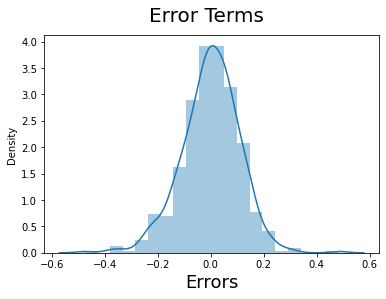

In [663]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

## Making Predictions

#### Applying the scaling on the test sets

In [664]:
num_vars =  ['temp', 'hum', 'windspeed', 'cnt']

df_test[num_vars] = scaler.transform(df_test[num_vars])

### dividing the test data set into ytest and x test

In [665]:
df_test.head(2)

holiday  workingday      temp       hum  windspeed       cnt  spring  \
184        1           0  0.831783  0.657364   0.084219  0.692706       0   
535        0           1  0.901354  0.610133   0.153728  0.712034       0   

     summer  winter  2019  ...  Oct  Sep  Monday  Saturday  Sunday  Thursday  \
184       0       0     0  ...    0    0       0         0       0         0   
535       1       0     1  ...    0    0       0         0       0         1   

     Tuesday  Wednesday  Light Snow  Mist & Cloudy  
184        0          1           0              1  
535        0          0           0              0  

[2 rows x 29 columns]

In [666]:
y_test = df_test.pop('cnt')
X_test = df_test

In [667]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_new.columns]

# Adding a constant variable 
X_test_new_sm = sm.add_constant(X_test_new)

In [668]:
X_test_new_sm.columns

Index(['const', 'holiday', 'windspeed', 'spring', 'summer', 'winter', '2019',
       'Sep', 'Light Snow', 'Mist & Cloudy'],
      dtype='object')

In [669]:
# Making predictions
y_pred = lm.predict(X_test_new_sm)

Text(0, 0.5, 'y_pred')

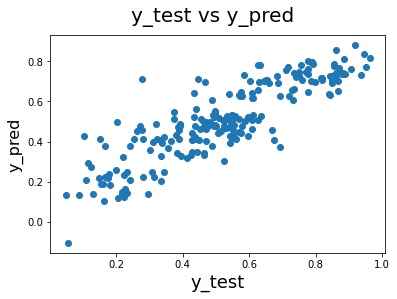

In [670]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                    

In [671]:
from sklearn.metrics import r2_score
r2_score(y_true=y_test, y_pred=y_pred)

0.7412090812945695

##### We have seen that the R2 score on training set was 0.763 and on the test set it is 0.741
Looking at the r2_score we can say that, what the model has learnt in the training set; it is also able to generalise on the test set.

In [672]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.763
Model:                            OLS   Adj. R-squared:                  0.759
Method:                 Least Squares   F-statistic:                     179.2
Date:                Mon, 09 Jan 2023   Prob (F-statistic):          2.74e-150
Time:                        01:30:50   Log-Likelihood:                 406.06
No. Observations:                 510   AIC:                            -792.1
Df Residuals:                     500   BIC:                            -749.8
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.5795      0.015     39.516

In [673]:
lm.params

const            0.579505
holiday         -0.100770
windspeed       -0.170504
spring          -0.295903
summer          -0.041662
winter          -0.073646
2019             0.247224
Sep              0.076163
Light Snow      -0.297098
Mist & Cloudy   -0.090530
dtype: float64

In [674]:
lm.params.sort_values(ascending = False)

const            0.579505
2019             0.247224
Sep              0.076163
summer          -0.041662
winter          -0.073646
Mist & Cloudy   -0.090530
holiday         -0.100770
windspeed       -0.170504
spring          -0.295903
Light Snow      -0.297098
dtype: float64

### the model that the company can predict the demand for shared bikes with the available independent variable

cnt = (-0.100770) * holiday + ( -0.170504) * windspeed + (-0.295903) * spring + (-0.041662) * summer + (-0.073646) * winter + (0.247224) * 2019  + 0.076163 * sep + (-0.297098) * light snow + (-0.090530) * mist & cloudy +  0.579505


### this equation can be used by the management to understand how exactly the demands vary with different features